In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator

df=pd.read_csv('startup_funding.csv',encoding='utf-8',skipinitialspace=True)
q1=df.copy()
q1

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [2]:
q1['CityLocation'].unique()

array(['Bangalore', 'Mumbai', 'New Delhi', 'Hyderabad', 'Ahmedabad',
       'Gurgaon', 'Noida', 'Pune', 'Kolkata', 'bangalore', 'Trivandrum',
       'Chennai', 'Chandigarh', 'Jaipur', 'Vadodara', 'Surat',
       'Missourie', 'Panaji', 'Gwalior', 'Karur', 'Udupi', 'Kochi',
       'Indore', 'Singapore', 'Goa', 'Agra', 'Bangalore/ Bangkok',
       'Hubli', 'Delhi', 'Kerala', 'Kozhikode', 'US', 'Coimbatore',
       'Siliguri', nan, 'USA', 'Lucknow', 'Kanpur', 'SFO / Bangalore',
       'London', 'Seattle / Bangalore', 'Pune/Seattle', 'Pune / Dubai',
       'Bangalore / SFO', 'Varanasi', 'Bhopal', 'New Delhi / US',
       'Mumbai / UK', 'Jodhpur', 'Hyderabad/USA', 'Boston',
       'Bangalore / Palo Alto', 'Mumbai / NY', 'USA/India',
       'Goa/Hyderabad', 'Noida / Singapore', 'Belgaum', 'Pune / US',
       'Chennai/ Singapore', 'Pune / Singapore', 'Bangalore / San Mateo',
       'New York/ India', 'US/India', 'Gurgaon / SFO', 'Bangalore / USA',
       'New Delhi/ Houston', 'Nagpur', 'Mumbai

In [3]:
def separateCity(city):
    string=str(city)
    return string.split('/')[0].strip()
    
q1['CityLocation']=q1['CityLocation'].apply(separateCity)

In [4]:
q1.dropna(subset=['CityLocation'],inplace=True)
q1['CityLocation'].replace('Delhi','New Delhi',inplace=True)
q1['CityLocation'].replace('bangalore','Bangalore',inplace=True)
q1['CityLocation'].replace('Gurgaon','New Delhi',inplace=True)
q1['CityLocation'].replace('Noida','New Delhi',inplace=True)
q1['CityLocation'].replace('New Delhi','NCR',inplace=True)

In [5]:
q1['CityLocation'].unique()

array(['Bangalore', 'Mumbai', 'NCR', 'Hyderabad', 'Ahmedabad', 'Pune',
       'Kolkata', 'Trivandrum', 'Chennai', 'Chandigarh', 'Jaipur',
       'Vadodara', 'Surat', 'Missourie', 'Panaji', 'Gwalior', 'Karur',
       'Udupi', 'Kochi', 'Indore', 'Singapore', 'Goa', 'Agra', 'Hubli',
       'Kerala', 'Kozhikode', 'US', 'Coimbatore', 'Siliguri', 'nan',
       'USA', 'Lucknow', 'Kanpur', 'SFO', 'London', 'Seattle', 'Varanasi',
       'Bhopal', 'Jodhpur', 'Boston', 'Belgaum', 'New York', 'Nagpur',
       'India', 'Udaipur', 'Dallas'], dtype=object)

In [6]:
q1=q1[(q1['CityLocation']=='Mumbai') | (q1['CityLocation']=='Bangalore') | (q1['CityLocation']=='NCR')]
q1

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,NCR,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
5,5,01/07/2017,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,"1,000,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2194,2194,29/04/2015,ReGlobe,Used Gadgets Buy / Refurbishing,NaN,NCR,"Bessemer Ventures, Blume Ventures",Seed Funding,"1,000,000",NaN
2196,2196,29/04/2015,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,"3,500,000",Series A
2197,2197,29/04/2015,Dazo,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,NaN,NaN
2198,2198,29/04/2015,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,"400,000",NaN


In [7]:
cities=q1['CityLocation'].value_counts()
city=cities.index
count=cities.values

for i in range(len(cities)):
    print(city[i],count[i])

NCR 709
Bangalore 635
Mumbai 449


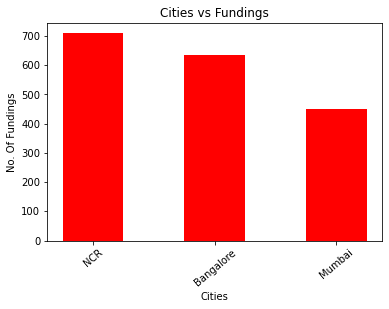

In [8]:
plt.bar(city,count,width=0.5,color='r')
plt.title('Cities vs Fundings')
plt.xlabel('Cities')
plt.ylabel('No. Of Fundings')
plt.xticks(rotation=40)
plt.show()

NCR 709
Bangalore 635
Mumbai 449


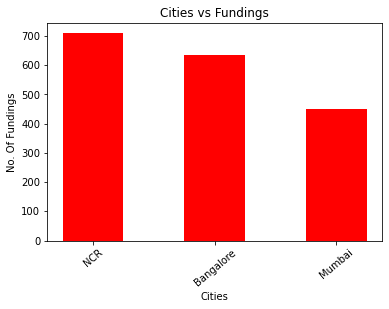

In [9]:
# import required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Read Dataset
df=pd.read_csv('startup_funding.csv',encoding='utf-8',skipinitialspace=True)
q1=df.copy()

#write a function to split city about '/'  and then strip to avoid any side space
def separateCity(city):
    string=str(city)
    return string.split('/')[0].strip()
    
q1['CityLocation']=q1['CityLocation'].apply(separateCity)

#Clean Data by droping nan values and replace the names required
q1.dropna(subset=['CityLocation'],inplace=True)
q1['CityLocation'].replace('Delhi','New Delhi',inplace=True)
q1['CityLocation'].replace('bangalore','Bangalore',inplace=True)
q1['CityLocation'].replace('Gurgaon','New Delhi',inplace=True)
q1['CityLocation'].replace('Noida','New Delhi',inplace=True)
q1['CityLocation'].replace('New Delhi','NCR',inplace=True)

#Apply Filters to get the requireed Data in a DataFrame
q1=q1[(q1['CityLocation']=='Mumbai') | (q1['CityLocation']=='Bangalore') | (q1['CityLocation']=='NCR')]

#Then found the count of the cities
cities=q1['CityLocation'].value_counts()
city=cities.index
count=cities.values

#printing the city name and No.of Fundings
for i in range(len(cities)):
    print(city[i],count[i])

#Plot a bar graph by using city names in x-axis and No.of Fundings in y-axis
plt.bar(city,count,width=0.5,color='r')
plt.title('Cities vs Fundings')
plt.xlabel('Cities')
plt.ylabel('No. Of Fundings')
plt.xticks(rotation=40)
plt.show()

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import operator

df=pd.read_csv('startup_funding.csv',encoding='utf-8',skipinitialspace=True)
q2=df.copy()
q2

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [11]:
def dictionary_Investers(arr):
    d={}
    #here we have set investers name as keys and their count as values
    for i in arr:
        if ',' not in i and i!='':
            d[i]=d.get(i,0)+1
        else:
            #we have to split the investers name list
            string=i.strip().split(',')
            for j in string:
                if j!='':
                    d[j.strip()]=d.get(j.strip(),0)+1
    return d

In [12]:
q2.dropna(subset=['InvestorsName'],inplace=True)
dic=dictionary_Investers(q2['InvestorsName'])
dic

{'Kae Capital': 22,
 'Triton Investment Advisors': 1,
 'Kashyap Deorah': 3,
 'Anand Sankeshwar': 2,
 'Deepak Jain': 1,
 'Sadashiva NT': 1,
 'Arjun Mehta': 1,
 'Satish Kaul': 1,
 'Anindya Ghose': 1,
 'Kunal Shah': 17,
 'LetsVenture': 17,
 'Anupam Mittal': 18,
 'Hetal Sonpal': 1,
 'Narottam Thudi': 1,
 'Shireesh Palle': 1,
 'Reliance Corporate Advisory Services Ltd': 1,
 'Infuse Ventures': 8,
 'JLL': 2,
 'Asset Management (Asia) Ltd': 1,
 'Digital Garage Inc': 1,
 'Kalaari Capital': 44,
 'Nexus India Capital Advisors': 1,
 'International Finance Corporation': 2,
 'Rocketship': 2,
 'Accel Partners': 53,
 'Jungle Ventures': 13,
 'Shailesh Rao': 1,
 'Venture Highway': 3,
 'BCCL': 1,
 'Blume Ventures': 39,
 'Contrarian Capital India Partners': 1,
 'Emergent Ventures India': 1,
 'Pallav Nadhani': 4,
 'Ashish Gupta': 6,
 'Sharad Sharma': 4,
 'Sirion Labs': 1,
 'India Quotient': 21,
 'Shunwei Capital': 3,
 'Sreeram Iyer': 1,
 'Suvo Sarkar': 1,
 'Anita Gupta': 1,
 'Likemind Ventures': 1,
 'Mitsu

In [13]:
k=sorted(dic.items(),key=operator.itemgetter(1),reverse=True)[:5]

x=[]
y=[]
for i in k:
    x.append(i[0])
    y.append(i[1])

for j in range(len(k)):
    print(x[j],y[j])

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


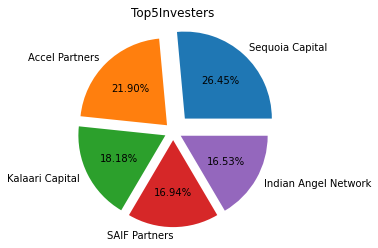

In [14]:
explode  =  [.2,.1,.1,.1,.1]
plt.pie(y,labels=x,explode=explode,autopct='%.2f%%')
plt.title("Top5Investers")
plt.show()

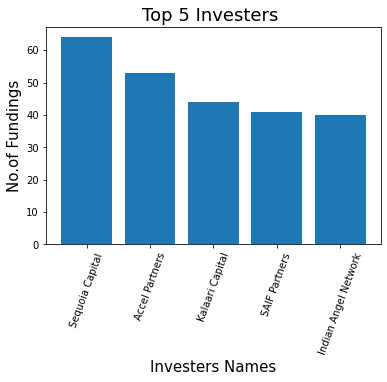

In [15]:
# plot bar chat for top 5 investers
plt.bar(x,y)
plt.title('Top 5 Investers ',fontsize=18)
plt.xlabel('Investers Names',fontsize=15)
plt.ylabel('No.of Fundings',fontsize=15)
plt.xticks(rotation=70)
plt.show()

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


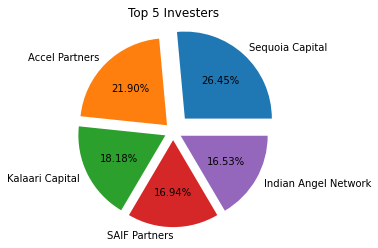

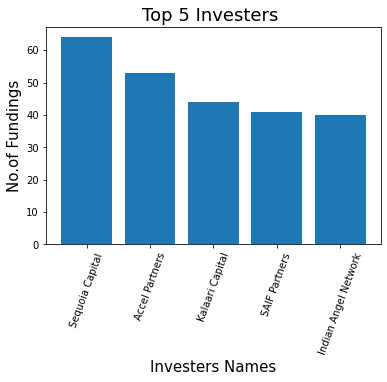

In [16]:
#Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import operator

#Read Dataset
df=pd.read_csv('startup_funding.csv',encoding='utf-8',skipinitialspace=True)
q2=df.copy()

#Define a Function to get the Investers Count
def dictionary_Investers(arr):
    d={}
    #here we have set investers name as keys and their count as values
    for i in arr:
        if ',' not in i and i!='':
            d[i]=d.get(i,0)+1
        else:
            #we have to split the investers name list
            string=i.strip().split(',')
            for j in string:
                if j!='':
                    d[j.strip()]=d.get(j.strip(),0)+1
    return d

#Clean Data by Droping Nan Values and apply Function to get the investers count
q2.dropna(subset=['InvestorsName'],inplace=True)
dic=dictionary_Investers(q2['InvestorsName'])

#Apply slicing to get get top5 investers
k=sorted(dic.items(),key=operator.itemgetter(1),reverse=True)[:5]
x=[] #investers Name
y=[] #count
for i in k:
    x.append(i[0])
    y.append(i[1])

#print investers name and count
for j in range(len(k)):
    print(x[j],y[j])

#plot pie chart for top 5 investers
explode  =  [.2,.1,.1,.1,.1]
plt.pie(y,labels=x,explode=explode,autopct='%.2f%%')
plt.title('Top 5 Investers')
plt.show()

# plot bar chat for top 5 investers
plt.bar(x,y)
plt.title('Top 5 Investers ',fontsize=18)
plt.xlabel('Investers Names',fontsize=15)
plt.ylabel('No.of Fundings',fontsize=15)
plt.xticks(rotation=70)
plt.show()

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('startup_funding.csv',encoding='utf=8',skipinitialspace=True)
q3=df.copy()
q3

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [18]:
q3['StartupName'].replace('Olacabs','Ola',inplace=True) 
q3['StartupName'].replace('Ola Cabs','Ola',inplace=True) 
q3['StartupName'].replace('Flipkart.com','Flipkart',inplace=True) 
q3['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True) 
q3['StartupName'].replace('Oyo Rooms','Oyo',inplace=True) 
q3['StartupName'].replace('Oyorooms','Oyo',inplace=True) 
q3['StartupName'].replace('OyoRooms','Oyo',inplace=True) 
q3['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
q3.dropna(inplace=True,subset=['StartupName','InvestorsName'])
q3

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [19]:
startups=list(q3['StartupName'])
investers_list=list(q3['InvestorsName'])

print(startups)
print(investers_list)

['TouchKin', 'Ethinos', 'Leverage Edu', 'Zepo', 'Click2Clinic', 'Billion Loans', 'Ecolibriumenergy', 'Droom', 'Jumbotail', 'Moglix', 'Timesaverz', 'Minjar', 'Clip App', 'Upwardly.in', 'Autorox.co', 'Fabogo', 'Flickstree', 'Design Cafe', 'Innoviti', 'VDeliver', 'Bottr.me', 'Arcatron', 'QwikSpec', 'Chumbak', 'Increff', 'Vayana', 'MObiquest', 'Ambee', 'Ideal Insurance', 'Hypernova Interactive', 'Rentomojo', 'AirCTO', 'Playablo', 'Trupay', 'Brick2Wall', 'FableStreet', 'Monsoon Fintech', 'MonkeyBox', 'Noticeboard', 'Byju’s', 'Creator’s Gurukul', 'Fab Hotels', 'ThinkerBell', '1mg', 'Jhakaas', 'BigStylist', 'Gympik.com', 'Tripeur', 'RentOnGo', 'Goomo', 'MaxMyWealth', 'Spinny', 'Healthbuds', 'Ftcash', 'BHIVE Workspace', 'wayForward', 'GyanDhan', 'Hungry Foal', 'ZipLoan', 'GrowFitter', 'Stratfit', 'Multiplier Solutions', 'ABI Health', 'Stockal', 'Guidoo', 'eSahai.in', 'Loanmeet', 'LendingKart', 'Boxx.ai', 'PeeSafe.in', 'Vista Rooms', 'CoverFox', 'HyperTrack', 'Goodera', 'Digit', 'Ola', 'Vanityc

In [20]:
d={}

for i in range(len(startups)):
    investers=investers_list[i].split(',')
    for invest in investers:
        invest=invest.strip()
        if invest!='':
            if startups[i] in d:
                d[startups[i]].append(invest)
            else:
                d[startups[i]]=[]
                d[startups[i]].append(invest)
d

{'TouchKin': ['Kae Capital'],
 'Ethinos': ['Triton Investment Advisors'],
 'Leverage Edu': ['Kashyap Deorah',
  'Anand Sankeshwar',
  'Deepak Jain',
  'Sadashiva NT',
  'Arjun Mehta',
  'Satish Kaul',
  'Anindya Ghose'],
 'Zepo': ['Kunal Shah', 'LetsVenture', 'Anupam Mittal', 'Hetal Sonpal'],
 'Click2Clinic': ['Narottam Thudi', 'Shireesh Palle'],
 'Billion Loans': ['Reliance Corporate Advisory Services Ltd'],
 'Ecolibriumenergy': ['Infuse Ventures', 'JLL'],
 'Droom': ['Asset Management (Asia) Ltd',
  'Digital Garage Inc',
  'Beenext',
  'Digital Garage',
  'Lightbox',
  'Beenos'],
 'Jumbotail': ['Kalaari Capital', 'Nexus India Capital Advisors'],
 'Moglix': ['International Finance Corporation',
  'Rocketship',
  'Accel Partners',
  'Jungle Ventures',
  'Shailesh Rao',
  'Venture Highway',
  'Accel Partners',
  'Jungle Ventures',
  'SeedPlus',
  'Ratan Tata',
  'Accel Partner',
  'Jungle Ventures'],
 'Timesaverz': ['BCCL'],
 'Minjar': ['Blume Ventures',
  'Contrarian Capital India Partn

In [21]:
k={}
for j in d.values():
    for x in set(j):
        k[x]=k.get(x,0)+1
k

{'Kae Capital': 20,
 'Triton Investment Advisors': 1,
 'Deepak Jain': 1,
 'Anindya Ghose': 1,
 'Satish Kaul': 1,
 'Arjun Mehta': 1,
 'Anand Sankeshwar': 2,
 'Sadashiva NT': 1,
 'Kashyap Deorah': 3,
 'Hetal Sonpal': 1,
 'Kunal Shah': 17,
 'LetsVenture': 17,
 'Anupam Mittal': 18,
 'Narottam Thudi': 1,
 'Shireesh Palle': 1,
 'Reliance Corporate Advisory Services Ltd': 1,
 'JLL': 2,
 'Infuse Ventures': 8,
 'Asset Management (Asia) Ltd': 1,
 'Beenext': 7,
 'Lightbox': 1,
 'Beenos': 7,
 'Digital Garage': 4,
 'Digital Garage Inc': 1,
 'Nexus India Capital Advisors': 1,
 'Kalaari Capital': 41,
 'Jungle Ventures': 11,
 'SeedPlus': 2,
 'Venture Highway': 3,
 'Accel Partner': 2,
 'Rocketship': 2,
 'Accel Partners': 47,
 'Shailesh Rao': 1,
 'International Finance Corporation': 2,
 'Ratan Tata': 30,
 'BCCL': 1,
 'Sharad Sharma': 4,
 'Pallav Nadhani': 4,
 'Blume Ventures': 36,
 'Contrarian Capital India Partners': 1,
 'Emergent Ventures India': 1,
 'Sirion Labs': 1,
 'Ashish Gupta': 5,
 'India Quoti

In [22]:
m=sorted(k.items(),key=operator.itemgetter(1),reverse=True)[:5]
x=[] #investers Name
y=[] #count
for i in m:
    x.append(i[0])
    y.append(i[1])
for j in range(len(m)):
    print(x[j],y[j])

Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


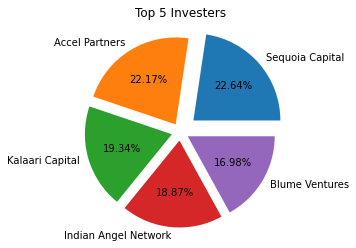

In [23]:
explode  =  [.2,.1,.1,.1,.1]
plt.pie(y,labels=x,explode=explode,autopct='%.2f%%')
plt.title('Top 5 Investers')
plt.show()

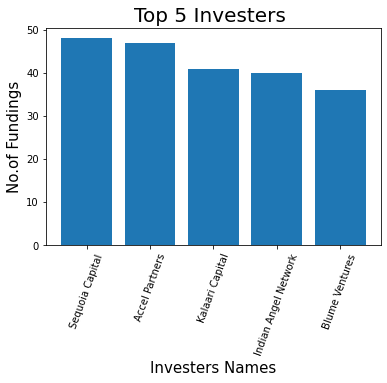

In [24]:
# plot bar chat for top 5 investers 
plt.bar(x,y)
plt.title('Top 5 Investers ',fontsize=20)
plt.xlabel('Investers Names',fontsize=15)
plt.ylabel('No.of Fundings',fontsize=15)
plt.xticks(rotation=70)
plt.show()

Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


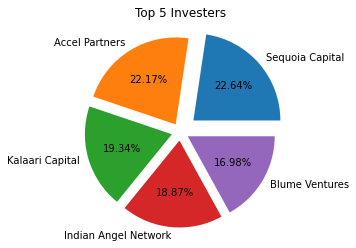

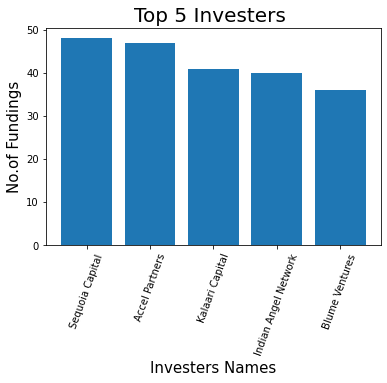

In [25]:
#Import Required Libraries
import pandas as pd
import operator
import matplotlib.pyplot as plt

#Read Dataset
df=pd.read_csv('startup_funding.csv',encoding='utf=8',skipinitialspace=True)
q3=df.copy()

#Clean Data by Droping Nan Values and apply Function to get the investers count
q3['StartupName'].replace('Olacabs','Ola',inplace=True) 
q3['StartupName'].replace('Ola Cabs','Ola',inplace=True) 
q3['StartupName'].replace('Flipkart.com','Flipkart',inplace=True) 
q3['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True) 
q3['StartupName'].replace('Oyo Rooms','Oyo',inplace=True) 
q3['StartupName'].replace('Oyorooms','Oyo',inplace=True) 
q3['StartupName'].replace('OyoRooms','Oyo',inplace=True) 
q3['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
q3.dropna(inplace=True,subset=['StartupName','InvestorsName'])

startups=list(q3['StartupName'])
investers_list=list(q3['InvestorsName'])

# create a dictionary of startup name and investers in that startup
d={}
for i in range(len(startups)):
    investers=investers_list[i].split(',')  # list of investers separated by ','
    for invest in investers:
        invest=invest.strip() # to remove the spaces present in the starting of the investers name
        if invest!='':
            if startups[i] in d:
                d[startups[i]].append(invest)
            else:
                d[startups[i]]=[]
                d[startups[i]].append(invest)
                
#create another dictionary for investers name and their count by using above dictionary
k={}
for j in d.values():
    for x in set(j): # to get unique values
        k[x]=k.get(x,0)+1
        
#Apply slicing to get get top5 investers
m=sorted(k.items(),key=operator.itemgetter(1),reverse=True)[:5]
x=[] #investers Name
y=[] #count
for i in m:
    x.append(i[0])
    y.append(i[1])
    
#print name of the investers and count
for j in range(len(m)):
    print(x[j],y[j])

#plot pie chart for top 5 investers
explode  =  [.2,.1,.1,.1,.1]
plt.pie(y,labels=x,explode=explode,autopct='%.2f%%')
plt.title('Top 5 Investers')
plt.show()

# plot bar chat for top 5 investers 
plt.bar(x,y)
plt.title('Top 5 Investers ',fontsize=20)
plt.xlabel('Investers Names',fontsize=15)
plt.ylabel('No.of Fundings',fontsize=15)
plt.xticks(rotation=70)
plt.show()

In [26]:
#Import Required Libraries
import pandas as pd
import operator
import matplotlib.pyplot as plt

#Read Dataset
df=pd.read_csv('startup_funding.csv',encoding='utf=8',skipinitialspace=True)
q4=df.copy()
q4

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [27]:
q4['InvestmentType'].unique()

array(['Private Equity', 'Seed Funding', 'Debt Funding', nan,
       'SeedFunding', 'PrivateEquity', 'Crowd funding', 'Crowd Funding'],
      dtype=object)

In [28]:
q4['InvestmentType'].replace("Crowd funding", 'Crowd Funding', inplace = True)
q4['InvestmentType'].replace('PrivateEquity', 'Private Equity', inplace = True)
q4['InvestmentType'].replace('SeedFunding', 'Seed Funding', inplace = True)

In [29]:
q4['InvestmentType'].unique()

array(['Private Equity', 'Seed Funding', 'Debt Funding', nan,
       'Crowd Funding'], dtype=object)

In [30]:
q4['InvestorsName'].replace('Undisclosed investors','Undisclosed Investors',inplace=True)
q4['StartupName'].replace('Olacabs','Ola',inplace=True) 
q4['StartupName'].replace('Ola Cabs','Ola',inplace=True) 
q4['StartupName'].replace('Flipkart.com','Flipkart',inplace=True) 
q4['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True) 
q4['StartupName'].replace('Oyo Rooms','Oyo',inplace=True) 
q4['StartupName'].replace('Oyorooms','Oyo',inplace=True) 
q4['StartupName'].replace('OyoRooms','Oyo',inplace=True) 
q4['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
q4.dropna(inplace=True,subset=['StartupName','InvestorsName','InvestmentType'])

In [31]:
q4=q4[q4['InvestmentType']!='Private Equity']
q4=q4[q4['InvestmentType']!='Debt Equity']
q4

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
5,5,01/07/2017,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,"1,000,000",NaN
11,11,06/07/2017,Minjar,Technology,Cloud Solutions provider,Bangalore,"Blume Ventures, Contrarian Capital India Partn...",Seed Funding,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2356,2356,21/05/2015,Villgro,NaN,NaN,NaN,Michael & Susan Dell Foundation,Seed Funding,"3,250,000",To fund edu startups
2357,2357,22/01//2015,Corporate360,NaN,NaN,NaN,Group of Angel Investors,Seed Funding,"200,000",NaN
2358,2358,22/01/2015,Freshmonk,NaN,NaN,NaN,"August Capital Partners, Michael Blakey",Seed Funding,NaN,NaN
2362,2362,24/01/2015,Aasaanjobs,NaN,NaN,NaN,"Inventus Capital Partners, IDG Ventures",Seed Funding,"1,500,000",NaN


In [32]:
startups=list(q4['StartupName'])
investers_list=list(q4['InvestorsName'])

print(startups)
print(investers_list)

['Leverage Edu', 'Zepo', 'Click2Clinic', 'Billion Loans', 'Minjar', 'Clip App', 'Upwardly.in', 'Flickstree', 'Design Cafe', 'Bottr.me', 'Arcatron', 'QwikSpec', 'Increff', 'Ambee', 'Ideal Insurance', 'Hypernova Interactive', 'AirCTO', 'Playablo', 'Trupay', 'Brick2Wall', 'FableStreet', 'Monsoon Fintech', 'MonkeyBox', 'Creator’s Gurukul', 'ThinkerBell', 'Jhakaas', 'Gympik.com', 'Tripeur', 'Healthbuds', 'wayForward', 'ZipLoan', 'GrowFitter', 'Stratfit', 'Stockal', 'Guidoo', 'eSahai.in', 'Loanmeet', 'LendingKart', 'Vista Rooms', 'Vanitycask', 'MrNeeds', 'Fincash', 'PortDesk', 'EdgeFx', 'EazyDiner', 'HealthIntel', 'ForeverShop', 'Fabulyst', 'Explore Life traveling', 'Voxweb', 'Spares Hub', 'FiTraQ', 'Innovapptive', 'ZippServe', 'Sumeru', 'HealthMir', 'Uactive', 'i-lend', 'Balance App', 'Nightstay', 'Devourin', 'MyGreens', 'Curie Labs', 'Uncanny Vision', 'Lucideus', 'Fourth Ambit', 'Chymera VR', 'Book My Diamond', 'ION Energy', 'Log 9 Materials', 'Aequm', 'Zapty', 'Vernacular.ai', 'Genie', 'T

In [33]:
# create a dictionary of startup name and investers in that startup
d={}
for i in range(len(startups)):
    investers=investers_list[i].split(',')  # list of investers separated by ','
    for invest in investers:
        invest=invest.strip() # to remove the spaces present in the starting of the investers name
        if invest!='' and invest!='Undisclosed Investors':
            if startups[i] in d:
                d[startups[i]].append(invest)
            else:
                d[startups[i]]=[]
                d[startups[i]].append(invest)
d

{'Leverage Edu': ['Kashyap Deorah',
  'Anand Sankeshwar',
  'Deepak Jain',
  'Sadashiva NT',
  'Arjun Mehta',
  'Satish Kaul',
  'Anindya Ghose'],
 'Zepo': ['Kunal Shah', 'LetsVenture', 'Anupam Mittal', 'Hetal Sonpal'],
 'Click2Clinic': ['Narottam Thudi', 'Shireesh Palle'],
 'Billion Loans': ['Reliance Corporate Advisory Services Ltd'],
 'Minjar': ['Blume Ventures',
  'Contrarian Capital India Partners',
  'Emergent Ventures India',
  'Pallav Nadhani',
  'Ashish Gupta',
  'Sharad Sharma',
  'Sirion Labs'],
 'Clip App': ['India Quotient', 'Shunwei Capital'],
 'Upwardly.in': ['Sreeram Iyer',
  'Suvo Sarkar',
  'Anita Gupta',
  'Likemind Ventures'],
 'Flickstree': ['Venture Catalysts',
  'Sourav Ganguly',
  'Ankit Aditya',
  'Moksh Sports Ventures'],
 'Design Cafe': ['Fireside Ventures',
  'Apurva Salarpuria',
  'Sidharth Pansari',
  'Sprout Capital'],
 'Bottr.me': ['500 Startups',
  'Purvi Capital',
  'Rajan Anandan',
  'Abhishek Gupta'],
 'Arcatron': ['Indian Angel Network'],
 'QwikSpec

In [34]:
#create another dictionary for investers name and their count by using above dictionary
k={}
for j in d.values():
    for x in set(j): # to get unique values
        k[x]=k.get(x,0)+1
k

{'Deepak Jain': 1,
 'Anindya Ghose': 1,
 'Satish Kaul': 1,
 'Arjun Mehta': 1,
 'Anand Sankeshwar': 2,
 'Sadashiva NT': 1,
 'Kashyap Deorah': 3,
 'Hetal Sonpal': 1,
 'Kunal Shah': 14,
 'LetsVenture': 16,
 'Anupam Mittal': 16,
 'Narottam Thudi': 1,
 'Shireesh Palle': 1,
 'Reliance Corporate Advisory Services Ltd': 1,
 'Sharad Sharma': 4,
 'Pallav Nadhani': 3,
 'Blume Ventures': 10,
 'Contrarian Capital India Partners': 1,
 'Emergent Ventures India': 1,
 'Sirion Labs': 1,
 'Ashish Gupta': 5,
 'India Quotient': 10,
 'Shunwei Capital': 1,
 'Anita Gupta': 1,
 'Sreeram Iyer': 1,
 'Likemind Ventures': 1,
 'Suvo Sarkar': 1,
 'Sourav Ganguly': 1,
 'Venture Catalysts': 5,
 'Moksh Sports Ventures': 1,
 'Ankit Aditya': 1,
 'Apurva Salarpuria': 1,
 'Sidharth Pansari': 2,
 'Sprout Capital': 1,
 'Fireside Ventures': 4,
 'Rajan Anandan': 23,
 'Abhishek Gupta': 1,
 'Purvi Capital': 2,
 '500 Startups': 11,
 'Indian Angel Network': 33,
 'Bobby Reddy': 1,
 'Brigade Innovations LLP': 1,
 'Suhail Rahman': 1,

In [35]:
#Apply slicing to get get top5 investers
m=sorted(k.items(),key=operator.itemgetter(1),reverse=True)[:5]
x=[] #investers Name
y=[] #count
for i in m:
    x.append(i[0])
    y.append(i[1])
    
#print name of the investers and count
for j in range(len(m)):
    print(x[j],y[j])

Indian Angel Network 33
Rajan Anandan 23
LetsVenture 16
Anupam Mittal 16
Kunal Shah 14


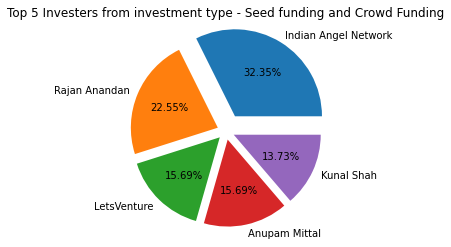

In [36]:
#plot pie chart for top 5 investers
explode  =  [.2,.1,.1,.1,.1]
plt.pie(y,labels=x,explode=explode,autopct='%.2f%%')
plt.title('Top 5 Investers from investment type - Seed funding and Crowd Funding')
plt.show()

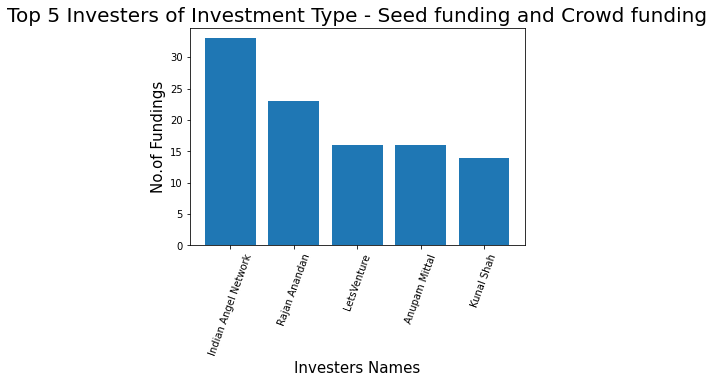

In [37]:
# plot bar chat for top 5 investers of investment type - seed funding and crowd funding
plt.bar(x,y)
plt.title('Top 5 Investers of Investment Type - Seed funding and Crowd funding',fontsize=20)
plt.xlabel('Investers Names',fontsize=15)
plt.ylabel('No.of Fundings',fontsize=15)
plt.xticks(rotation=70)
plt.show()

Indian Angel Network 33
Rajan Anandan 23
LetsVenture 16
Anupam Mittal 16
Kunal Shah 14


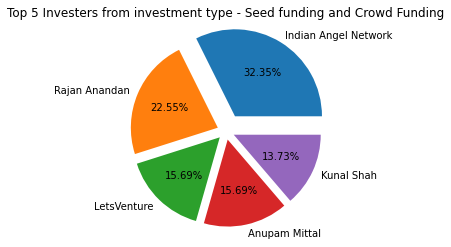

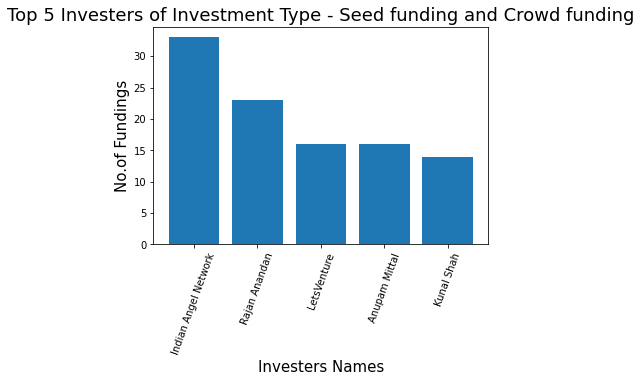

In [38]:
#Import Required Libraries
import pandas as pd
import operator
import matplotlib.pyplot as plt

#Read Dataset
df=pd.read_csv('startup_funding.csv',encoding='utf=8',skipinitialspace=True)
q4=df.copy()

#Clean Data by Droping Nan Values and apply Function to get the required data
q4['InvestmentType'].replace("Crowd funding", 'Crowd Funding', inplace = True)
q4['InvestmentType'].replace('PrivateEquity', 'Private Equity', inplace = True)
q4['InvestmentType'].replace('SeedFunding', 'Seed Funding', inplace = True)
q4['InvestorsName'].replace('Undisclosed investors','Undisclosed Investors',inplace=True)
q4['StartupName'].replace('Olacabs','Ola',inplace=True) 
q4['StartupName'].replace('Ola Cabs','Ola',inplace=True) 
q4['StartupName'].replace('Flipkart.com','Flipkart',inplace=True) 
q4['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True) 
q4['StartupName'].replace('Oyo Rooms','Oyo',inplace=True) 
q4['StartupName'].replace('Oyorooms','Oyo',inplace=True) 
q4['StartupName'].replace('OyoRooms','Oyo',inplace=True) 
q4['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
q4.dropna(inplace=True,subset=['StartupName','InvestorsName','InvestmentType'])

q4=q4[q4['InvestmentType']!='Private Equity']
q4=q4[q4['InvestmentType']!='Debt Equity']

startups=list(q4['StartupName'])
investers_list=list(q4['InvestorsName'])

# create a dictionary of startup name and investers in that startup
d={}
for i in range(len(startups)):
    investers=investers_list[i].split(',')  # list of investers separated by ','
    for invest in investers:
        invest=invest.strip() # to remove the spaces present in the starting of the investers name
        if invest!='' and invest!='Undisclosed Investors':
            if startups[i] in d:
                d[startups[i]].append(invest)
            else:
                d[startups[i]]=[]
                d[startups[i]].append(invest)
                
#create another dictionary for investers name and their count by using above dictionary
k={}
for j in d.values():
    for x in set(j): # to get unique values
        k[x]=k.get(x,0)+1
        
#Apply slicing to get get top5 investers
m=sorted(k.items(),key=operator.itemgetter(1),reverse=True)[:5]
x=[] #investers Name
y=[] #count
for i in m:
    x.append(i[0])
    y.append(i[1])
    
#print name of the investers and count
for j in range(len(m)):
    print(x[j],y[j])
    
#plot pie chart for top 5 investers
explode  =  [.2,.1,.1,.1,.1]
plt.pie(y,labels=x,explode=explode,autopct='%.2f%%')
plt.title('Top 5 Investers from investment type - Seed funding and Crowd Funding')
plt.show()

# plot bar chat for top 5 investers of investment type - seed funding and crowd funding
plt.bar(x,y)
plt.title('Top 5 Investers of Investment Type - Seed funding and Crowd funding',fontsize=18)
plt.xlabel('Investers Names',fontsize=15)
plt.ylabel('No.of Fundings',fontsize=15)
plt.xticks(rotation=70)
plt.show()

In [39]:
#Import Required Libraries
import pandas as pd
import operator
import matplotlib.pyplot as plt

#Read Dataset
df=pd.read_csv('startup_funding.csv',encoding='utf=8',skipinitialspace=True)
q5=df.copy()
q5

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [40]:
#Clean Data by Droping Nan Values and apply Function to get the required data
q5['InvestmentType'].replace("Crowd funding", 'Crowd Funding', inplace = True)
q5['InvestmentType'].replace('PrivateEquity', 'Private Equity', inplace = True)
q5['InvestmentType'].replace('SeedFunding', 'Seed Funding', inplace = True)
q5['InvestorsName'].replace('Undisclosed investors','Undisclosed Investors',inplace=True)
q5['StartupName'].replace('Olacabs','Ola',inplace=True) 
q5['StartupName'].replace('Ola Cabs','Ola',inplace=True) 
q5['StartupName'].replace('Flipkart.com','Flipkart',inplace=True) 
q5['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True) 
q5['StartupName'].replace('Oyo Rooms','Oyo',inplace=True) 
q5['StartupName'].replace('Oyorooms','Oyo',inplace=True) 
q5['StartupName'].replace('OyoRooms','Oyo',inplace=True) 
q5['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
q5.dropna(inplace=True,subset=['StartupName','InvestorsName','InvestmentType'])

q5=q5[q5['InvestmentType']=='Private Equity']
q5

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
6,6,03/07/2017,Ecolibriumenergy,Technology,Energy management solutions provider,Ahmedabad,"Infuse Ventures, JLL",Private Equity,"2,600,000",NaN
7,7,04/07/2017,Droom,eCommerce,Online marketplace for automobiles,Gurgaon,"Asset Management (Asia) Ltd, Digital Garage Inc",Private Equity,"20,000,000",NaN
8,8,05/07/2017,Jumbotail,eCommerce,online marketplace for food and grocery,Bangalore,"Kalaari Capital, Nexus India Capital Advisors",Private Equity,"8,500,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2366,2366,28/01/2015,Grabhouse.com,NaN,NaN,NaN,"Kalaari Capital, Sequoia Capital",Private Equity,"2,500,000",Series A
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN


In [41]:
startups=list(q5['StartupName'])
investers_list=list(q5['InvestorsName'])

# create a dictionary of startup name and investers in that startup
d={}
for i in range(len(startups)):
    investers=investers_list[i].split(',')  # list of investers separated by ','
    for invest in investers:
        invest=invest.strip() # to remove the spaces present in the starting of the investers name
        if invest!='' and invest!='Undisclosed Investors':
            if startups[i] in d:
                d[startups[i]].append(invest)
            else:
                d[startups[i]]=[]
                d[startups[i]].append(invest)
                
d

{'TouchKin': ['Kae Capital'],
 'Ethinos': ['Triton Investment Advisors'],
 'Ecolibriumenergy': ['Infuse Ventures', 'JLL'],
 'Droom': ['Asset Management (Asia) Ltd',
  'Digital Garage Inc',
  'Beenext',
  'Digital Garage',
  'Lightbox',
  'Beenos'],
 'Jumbotail': ['Kalaari Capital', 'Nexus India Capital Advisors'],
 'Moglix': ['International Finance Corporation',
  'Rocketship',
  'Accel Partners',
  'Jungle Ventures',
  'Shailesh Rao',
  'Venture Highway',
  'Accel Partners',
  'Jungle Ventures',
  'SeedPlus',
  'Ratan Tata',
  'Accel Partner',
  'Jungle Ventures'],
 'Timesaverz': ['BCCL'],
 'Autorox.co': ['Mitsui & Co.'],
 'Fabogo': ['Dunamis Ventures Pte Ltd'],
 'Innoviti': ['SBI-FMO Fund',
  'Bessemer Venture Partners',
  'Catamaran Ventures',
  'Catamaran Ventures',
  'New India Investment Corporation'],
 'VDeliver': ['Corvus Ventures', 'MAPE Advisory Group'],
 'Chumbak': ['Blacksoil Capital Pvt. Ltd'],
 'Vayana': ['IDG Ventures India Advisors', 'Jungle Ventures'],
 'MObiquest': ['

In [42]:
#create another dictionary for investers name and their count by using above dictionary
k={}
for j in d.values():
    for x in set(j): # to get unique values
        k[x]=k.get(x,0)+1
k

{'Kae Capital': 10,
 'Triton Investment Advisors': 1,
 'JLL': 1,
 'Infuse Ventures': 6,
 'Asset Management (Asia) Ltd': 1,
 'Beenext': 6,
 'Lightbox': 1,
 'Beenos': 6,
 'Digital Garage': 4,
 'Digital Garage Inc': 1,
 'Nexus India Capital Advisors': 1,
 'Kalaari Capital': 35,
 'Jungle Ventures': 8,
 'SeedPlus': 2,
 'Venture Highway': 2,
 'Accel Partner': 2,
 'Rocketship': 2,
 'Accel Partners': 43,
 'Shailesh Rao': 1,
 'International Finance Corporation': 2,
 'Ratan Tata': 21,
 'BCCL': 1,
 'Mitsui & Co.': 2,
 'Dunamis Ventures Pte Ltd': 1,
 'New India Investment Corporation': 1,
 'Bessemer Venture Partners': 11,
 'Catamaran Ventures': 2,
 'SBI-FMO Fund': 1,
 'MAPE Advisory Group': 1,
 'Corvus Ventures': 1,
 'Blacksoil Capital Pvt. Ltd': 1,
 'IDG Ventures India Advisors': 1,
 'One97 Communication Ltd': 1,
 'ain Capital Ventures': 1,
 'Renaud Laplanche': 1,
 'Stellaris Venture Partners': 3,
 'Sequoia India': 14,
 'Sequoia Capital': 45,
 'Sofina': 3,
 'Verlinvest': 1,
 'Chan Zuckerberg Init

In [43]:
#Apply slicing to get get top5 investers
m=sorted(k.items(),key=operator.itemgetter(1),reverse=True)[:5]
x=[] #investers Name
y=[] #count
for i in m:
    x.append(i[0])
    y.append(i[1])
    
#print name of the investers and count
for j in range(len(m)):
    print(x[j],y[j])

Sequoia Capital 45
Accel Partners 43
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 24


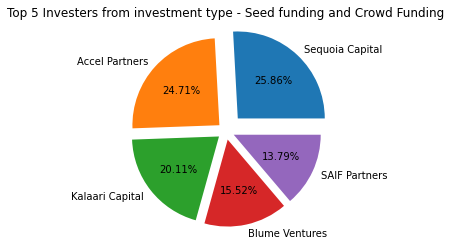

In [44]:
#plot pie chart for top 5 investers
explode  =  [.2,.1,.1,.1,.1]
plt.pie(y,labels=x,explode=explode,autopct='%.2f%%')
plt.title('Top 5 Investers from investment type - Seed funding and Crowd Funding')
plt.show()

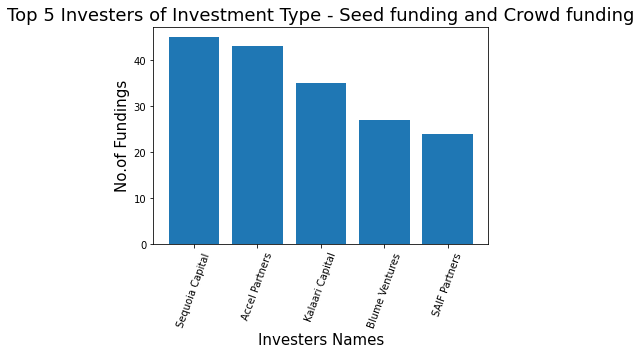

In [45]:
# plot bar chat for top 5 investers of investment type - seed funding and crowd funding
plt.bar(x,y)
plt.title('Top 5 Investers of Investment Type - Seed funding and Crowd funding',fontsize=18)
plt.xlabel('Investers Names',fontsize=15)
plt.ylabel('No.of Fundings',fontsize=15)
plt.xticks(rotation=70)
plt.show()

Sequoia Capital 45
Accel Partners 43
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 24


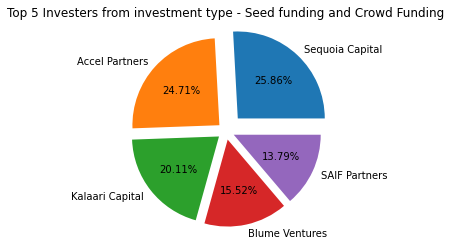

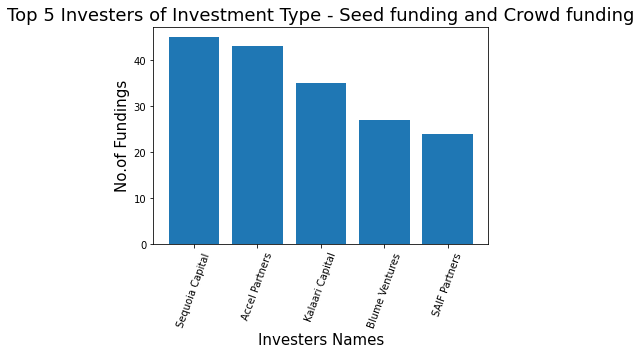

In [46]:
#Import Required Libraries
import pandas as pd
import operator
import matplotlib.pyplot as plt

#Read Dataset
df=pd.read_csv('startup_funding.csv',encoding='utf=8',skipinitialspace=True)
q5=df.copy()

#Clean Data by Droping Nan Values and apply Function to get the required data
q5['InvestmentType'].replace("Crowd funding", 'Crowd Funding', inplace = True)
q5['InvestmentType'].replace('PrivateEquity', 'Private Equity', inplace = True)
q5['InvestmentType'].replace('SeedFunding', 'Seed Funding', inplace = True)
q5['InvestorsName'].replace('Undisclosed investors','Undisclosed Investors',inplace=True)
q5['StartupName'].replace('Olacabs','Ola',inplace=True) 
q5['StartupName'].replace('Ola Cabs','Ola',inplace=True) 
q5['StartupName'].replace('Flipkart.com','Flipkart',inplace=True) 
q5['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True) 
q5['StartupName'].replace('Oyo Rooms','Oyo',inplace=True) 
q5['StartupName'].replace('Oyorooms','Oyo',inplace=True) 
q5['StartupName'].replace('OyoRooms','Oyo',inplace=True) 
q5['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
q5.dropna(inplace=True,subset=['StartupName','InvestorsName','InvestmentType'])

q5=q5[q5['InvestmentType']=='Private Equity']

startups=list(q5['StartupName'])
investers_list=list(q5['InvestorsName'])

# create a dictionary of startup name and investers in that startup
d={}
for i in range(len(startups)):
    investers=investers_list[i].split(',')  # list of investers separated by ','
    for invest in investers:
        invest=invest.strip() # to remove the spaces present in the starting of the investers name
        if invest!='' and invest!='Undisclosed Investors':
            if startups[i] in d:
                d[startups[i]].append(invest)
            else:
                d[startups[i]]=[]
                d[startups[i]].append(invest)
                
#create another dictionary for investers name and their count by using above dictionary
k={}
for j in d.values():
    for x in set(j): # to get unique values
        k[x]=k.get(x,0)+1
        
#Apply slicing to get get top5 investers
m=sorted(k.items(),key=operator.itemgetter(1),reverse=True)[:5]
x=[] #investers Name
y=[] #count
for i in m:
    x.append(i[0])
    y.append(i[1])
    
#print name of the investers and count
for j in range(len(m)):
    print(x[j],y[j])
    
#plot pie chart for top 5 investers
explode  =  [.2,.1,.1,.1,.1]
plt.pie(y,labels=x,explode=explode,autopct='%.2f%%')
plt.title('Top 5 Investers from investment type - Seed funding and Crowd Funding')
plt.show()

# plot bar chat for top 5 investers of investment type - seed funding and crowd funding
plt.bar(x,y)
plt.title('Top 5 Investers of Investment Type - Seed funding and Crowd funding',fontsize=18)
plt.xlabel('Investers Names',fontsize=15)
plt.ylabel('No.of Fundings',fontsize=15)
plt.xticks(rotation=70)
plt.show()